In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-19 14:09:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 108.177.111.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   212MB/s    in 0.3s    

2022-08-19 14:09:06 (212 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [3]:
import zipfile 

#unzip 
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [4]:
import os 
# joindir ==> path   ,,,, listdir ==> files
base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print ("\n content of train directory")
print(os.listdir(f'cats_and_dogs_filtered/train'))

print ("\n content of validation directory")
print(os.listdir(f'cats_and_dogs_filtered/validation'))

Contents of base directory:
['validation', 'train', 'vectorize.py']

 content of train directory
['dogs', 'cats']

 content of validation directory
['dogs', 'cats']


In [5]:
train_dir = os.path.join('cats_and_dogs_filtered','train')
validation_dir = os.path.join('cats_and_dogs_filtered','validation')

dog_train_dir = os.path.join(train_dir,'dogs')
cat_train_dir = os.path.join(train_dir,'cats')

dog_val_dir = os.path.join(validation_dir,'dogs')
cat_val_dir = os.path.join(validation_dir,'cats')

In [6]:
cat_fnames_dir = os.listdir(cat_train_dir)
dog_fnames_dir = os.listdir(dog_train_dir)

print(cat_fnames_dir[:7])
print(dog_fnames_dir[:7])

['cat.376.jpg', 'cat.34.jpg', 'cat.533.jpg', 'cat.863.jpg', 'cat.104.jpg', 'cat.63.jpg', 'cat.815.jpg']
['dog.605.jpg', 'dog.93.jpg', 'dog.909.jpg', 'dog.307.jpg', 'dog.772.jpg', 'dog.678.jpg', 'dog.667.jpg']


In [7]:
#the total number of data

print('the total number of dogs training data is: ',len(os.listdir(dog_train_dir)))
print('the total number of cats training data is: ',len(os.listdir(cat_train_dir)))
print('\n')
print('the total number of dogs validating data is: ',len(os.listdir(dog_val_dir)))
print('the total number of cats validating data is: ',len(os.listdir(cat_val_dir)))

the total number of dogs training data is:  1000
the total number of cats training data is:  1000


the total number of dogs validating data is:  500
the total number of cats validating data is:  500


In [8]:
%matplotlib inline 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#4x4 plot configuration 
nrows = 4 
ncols = 4    

pic_index = 0 #Index for iterating under images  

#testing
cat_fnames_dir[0:8]


['cat.376.jpg',
 'cat.34.jpg',
 'cat.533.jpg',
 'cat.863.jpg',
 'cat.104.jpg',
 'cat.63.jpg',
 'cat.815.jpg',
 'cat.996.jpg']

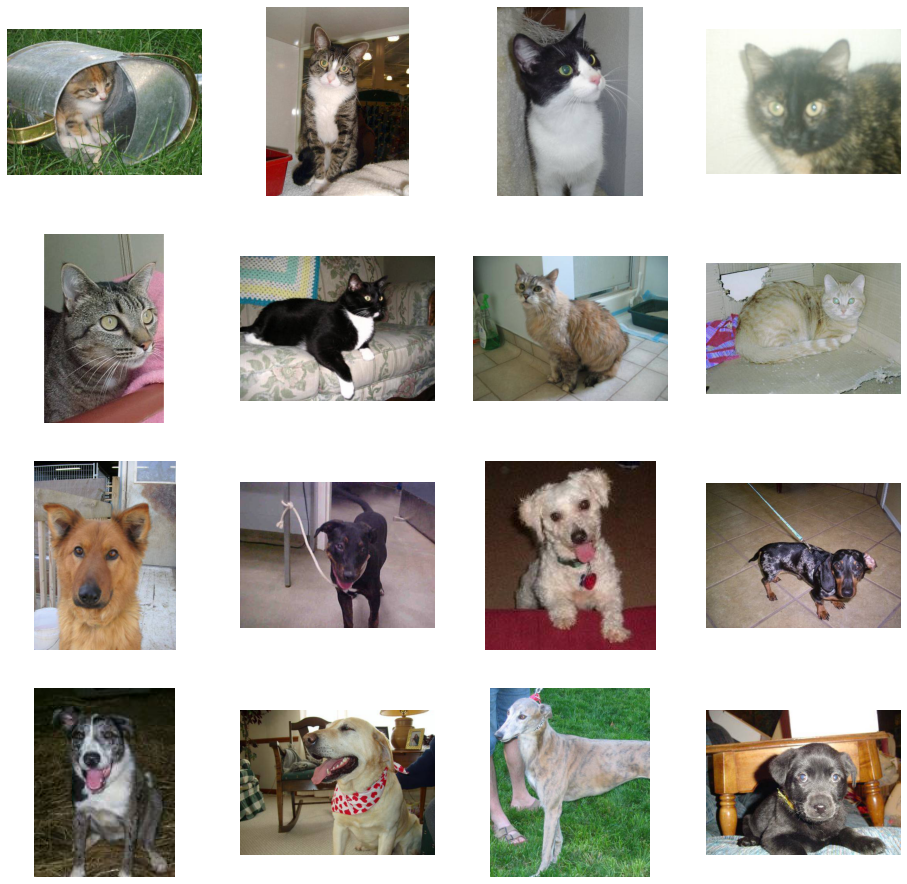

In [9]:
#plot config 
figure = plt.gcf()                        #create a matrix for images 
figure.set_size_inches(ncols*4,nrows*4)    #size of the matrix 


pic_index+=8 

next_cat_pix = [os.path.join(cat_train_dir , fname)
                for fname in cat_fnames_dir[ pic_index-8:pic_index]    #Selection of image paths by names of images in cat_train_dir path [0:8]
                ]
next_dog_pix = [os.path.join(dog_train_dir, fname) 
                for fname in dog_fnames_dir[ pic_index-8:pic_index]    
               ]            


for i, img_path in enumerate(next_cat_pix+next_dog_pix):              #enumerate ==>   (1,image1's path),(2,image2's path).... 
  sp=plt.subplot(nrows , ncols , i+1)    # image matrix 4x4    
  sp.axis(False)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neurons hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [11]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
#Data Training preprocessing
train_datagen = ImageDataGenerator (rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20 , class_mode = 'binary' , target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [14]:
#Data Evaluation preprocessing 
test_datagen= ImageDataGenerator (rescale = 1.0/255)

validation_generator = test_datagen.flow_from_directory(validation_dir , batch_size=20 ,class_mode = 'binary',target_size = (150,150))

Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            )

Epoch 1/15
100/100 [==============================] - 22s 90ms/step - loss: 0.7221 - accuracy: 0.5450 - val_loss: 0.6995 - val_accuracy: 0.5270
Epoch 2/15
100/100 [==============================] - 9s 92ms/step - loss: 0.6646 - accuracy: 0.6160 - val_loss: 0.6579 - val_accuracy: 0.6330
Epoch 3/15
100/100 [==============================] - 10s 96ms/step - loss: 0.5742 - accuracy: 0.7045 - val_loss: 0.6290 - val_accuracy: 0.6620
Epoch 4/15
100/100 [==============================] - 9s 93ms/step - loss: 0.5023 - accuracy: 0.7550 - val_loss: 0.5883 - val_accuracy: 0.6850
Epoch 5/15
100/100 [==============================] - 10s 96ms/step - loss: 0.3968 - accuracy: 0.8210 - val_loss: 0.5968 - val_accuracy: 0.7010
Epoch 6/15
100/100 [==============================] - 10s 96ms/step - loss: 0.3146 - accuracy: 0.8575 - val_loss: 0.7248 - val_accuracy: 0.6810
Epoch 7/15
100/100 [==============================] - 12s 117ms/step - loss: 0.2003 - accuracy: 0.9150 - val_loss: 0.8375 - val_accuracy: 

In [16]:
#we saw that there are a big different between validation and training accuracy 
#data augmentation
#Data preprocessing and augmentation
#Data Training preprocessing
train_datagen = ImageDataGenerator (rescale=1.0/255,
                               rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20 , class_mode = 'binary' , target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [17]:
history2 = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            )

Epoch 1/15
100/100 [==============================] - 19s 192ms/step - loss: 0.7942 - accuracy: 0.5705 - val_loss: 0.6724 - val_accuracy: 0.5960
Epoch 2/15
100/100 [==============================] - 20s 202ms/step - loss: 0.6713 - accuracy: 0.6015 - val_loss: 0.6787 - val_accuracy: 0.6000
Epoch 3/15
100/100 [==============================] - 18s 183ms/step - loss: 0.6600 - accuracy: 0.6215 - val_loss: 0.6073 - val_accuracy: 0.6800
Epoch 4/15
100/100 [==============================] - 18s 180ms/step - loss: 0.6300 - accuracy: 0.6590 - val_loss: 0.6069 - val_accuracy: 0.6840
Epoch 5/15
100/100 [==============================] - 18s 178ms/step - loss: 0.5975 - accuracy: 0.6945 - val_loss: 0.6631 - val_accuracy: 0.6170
Epoch 6/15
100/100 [==============================] - 17s 175ms/step - loss: 0.5947 - accuracy: 0.6800 - val_loss: 0.5765 - val_accuracy: 0.7140
Epoch 7/15
100/100 [==============================] - 18s 181ms/step - loss: 0.5842 - accuracy: 0.6855 - val_loss: 0.6031 - val_ac

In [ ]:
#as we apply data augmentation on the trainig data we see tht the difference decreased and and we avoid overfitting problem 
#we need in this case more optimization to increase the validation and training accuracy (more rpochs , decreasing the learning_rate ... ) 
#we plot the graph to see the differente between theses two training experiences 

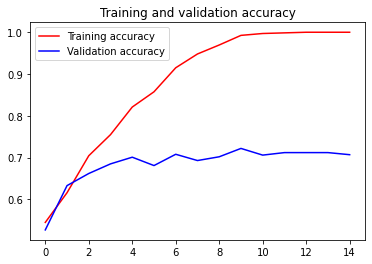

<Figure size 432x288 with 0 Axes>

overfitting problem because of the difference between validation and training accuracy after the 3 firsts epochs


In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

print('overfitting problem because of the difference between validation and training accuracy after the 3 firsts epochs') 

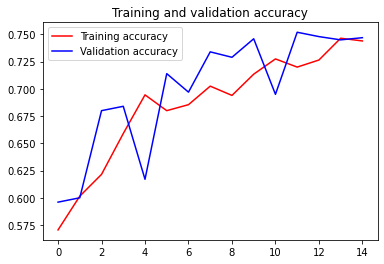

<Figure size 432x288 with 0 Axes>

overfitting problem solved but the model need to be more trained and optimized


In [22]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
print('overfitting problem solved but the model need to be more trained and optimized')